In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cpp_df = pd.read_csv("P:\Paritosh_personal\data science\data science\Capstone Project ML-O_N_D/crop_production.csv")
cpp_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data Exploration

In [3]:
cpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
cpp_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
cpp_df.shape[0]

246091

In [6]:
print((4948*100)/345336, '%')

1.4328074686681955 %


we have around 1.5% null values in production data, which is not much so we can do mean imputation and replace null values with mean value

In [7]:
cpp_df['Production'].mean()

582503.4422509839

In [8]:
cpp_df['Production'].fillna(cpp_df['Production'].mean(),inplace=True)

In [9]:
cpp_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Data Visulization

I am showing production according year in all the crops

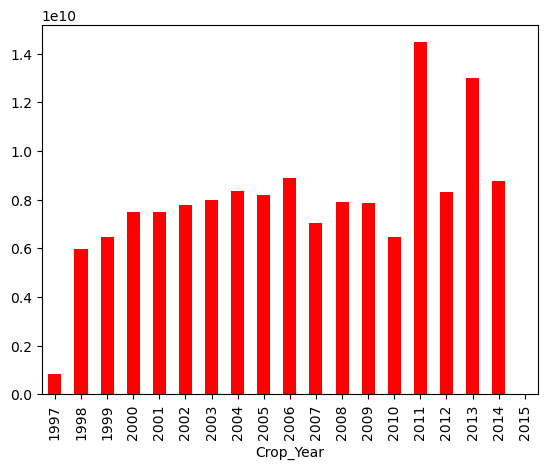

In [10]:
grouped_data = cpp_df.groupby(['Crop_Year'])
group_prod=grouped_data['Production'].sum()

group_prod.plot(kind='bar',color='red')
plt.show()

Here i am showing year wise production along eith crop contribution

In [11]:
grouped_data = cpp_df.groupby(['Crop_Year','Crop'])
group_prod=grouped_data['Production'].sum()
group_prod.head()

Crop_Year  Crop     
1997       Arecanut      308584.0
           Arhar/Tur    1693632.0
           Bajra        7622765.0
           Banana       8577683.0
           Barley       1586845.0
Name: Production, dtype: float64

In [12]:
group_prod = group_prod.unstack('Crop')
group_prod.head()

Crop,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Crop_Year,,,,,,,,,,,,,,,,,,,,,
1997,NaN,NaN,3.085840e+05,1.693632e+06,NaN,NaN,7.622765e+06,8.577683e+06,1.586845e+06,NaN,...,1.756140e+05,NaN,8.797390e+05,1600.0,NaN,6.383163e+07,NaN,NaN,NaN,NaN
1998,NaN,NaN,1.379957e+06,4.885421e+06,NaN,NaN,1.055702e+07,6.246379e+06,6.134148e+06,NaN,...,2.023310e+05,NaN,9.876575e+06,1500.0,NaN,7.028158e+07,NaN,NaN,NaN,7731.000000
1999,NaN,NaN,1.620250e+05,3.087613e+06,NaN,NaN,5.786558e+06,9.279624e+06,1.384461e+06,NaN,...,8.749414e+05,NaN,2.597913e+06,22576.0,NaN,7.506837e+07,NaN,NaN,NaN,NaN
2000,NaN,NaN,3.529150e+05,8.076151e+06,NaN,NaN,6.904935e+06,1.069213e+07,1.418351e+06,NaN,...,1.848435e+06,NaN,2.998200e+06,1216.0,NaN,6.948713e+07,NaN,NaN,3032.0,582939.442251
2001,NaN,NaN,3.740140e+05,3.993072e+06,NaN,NaN,8.266184e+06,7.707754e+06,1.417982e+06,NaN,...,4.010820e+05,NaN,2.468686e+06,671.0,NaN,7.323145e+07,NaN,NaN,NaN,582629.442251


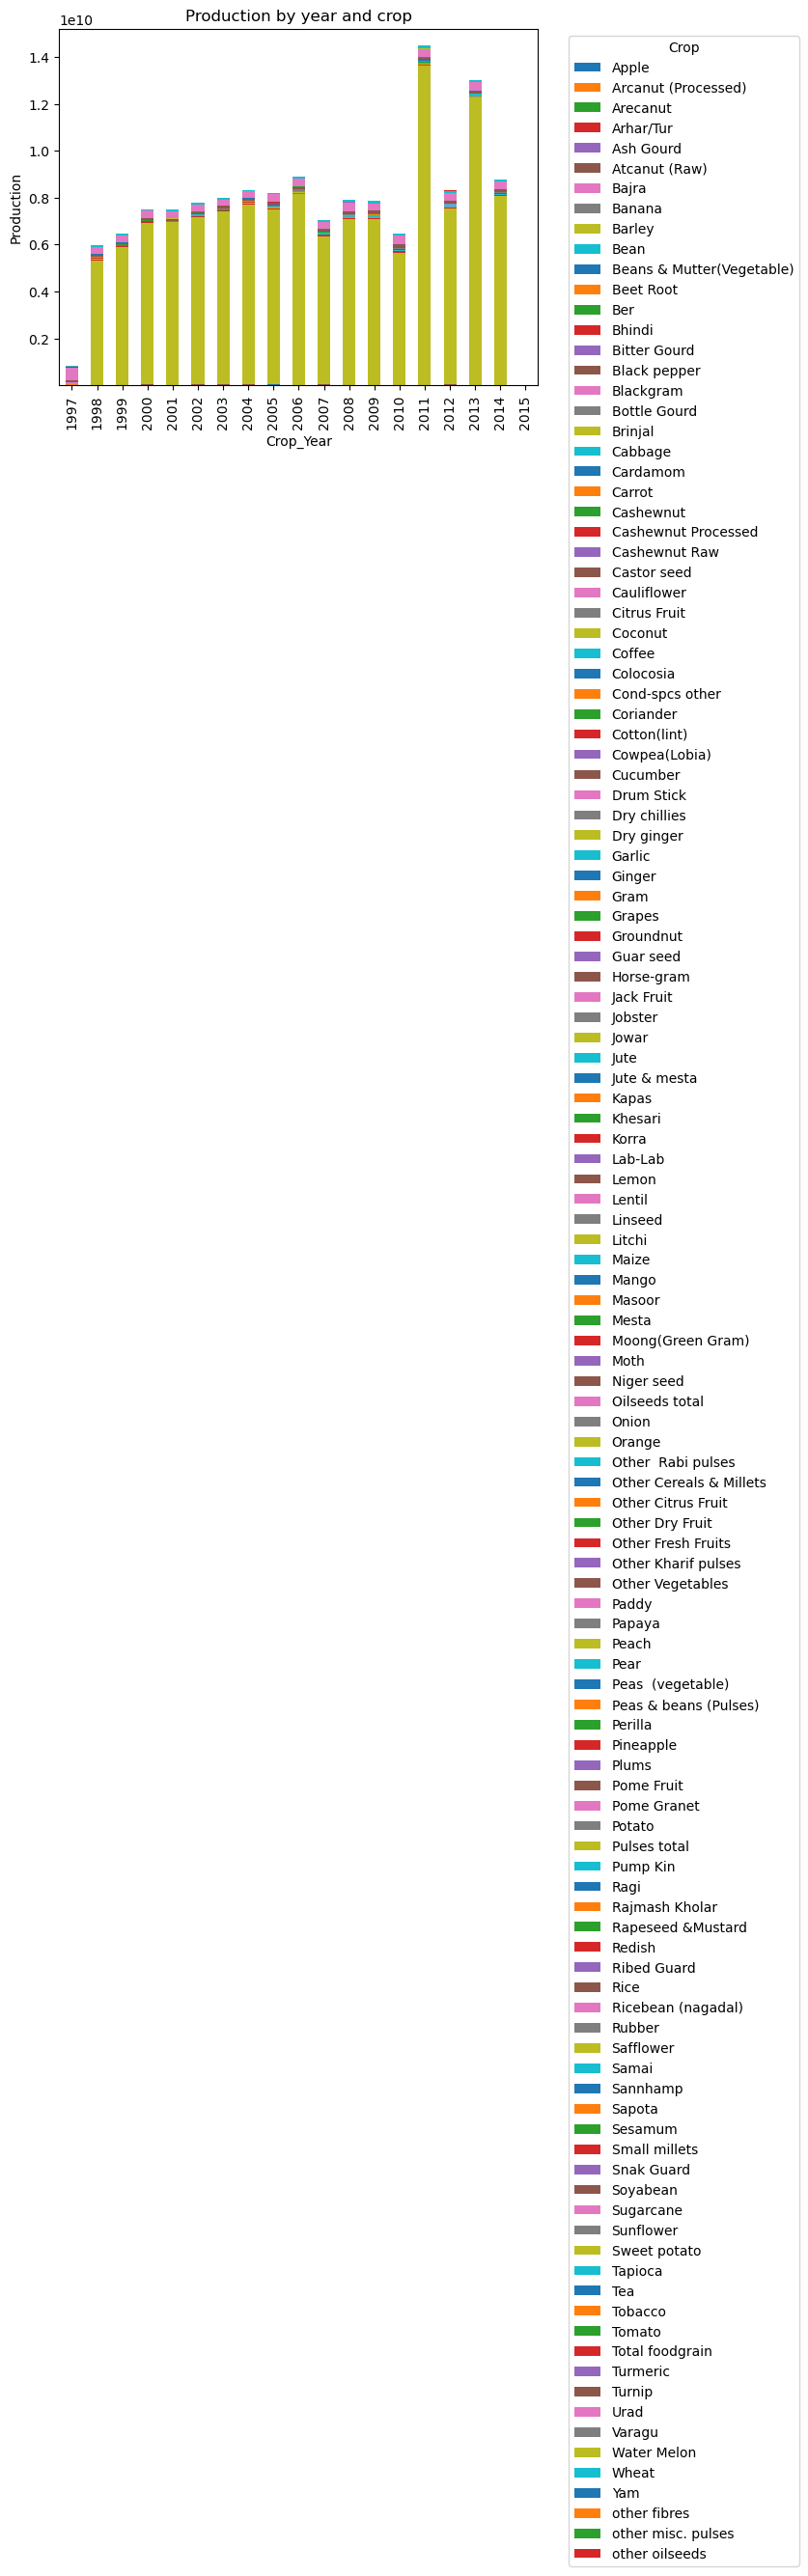

In [13]:
pl = group_prod.plot.bar(stacked=True)
pl.set_xlabel('Crop_Year')
pl.set_ylabel('Production')
pl.set_title('Production by year and crop')
pl.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

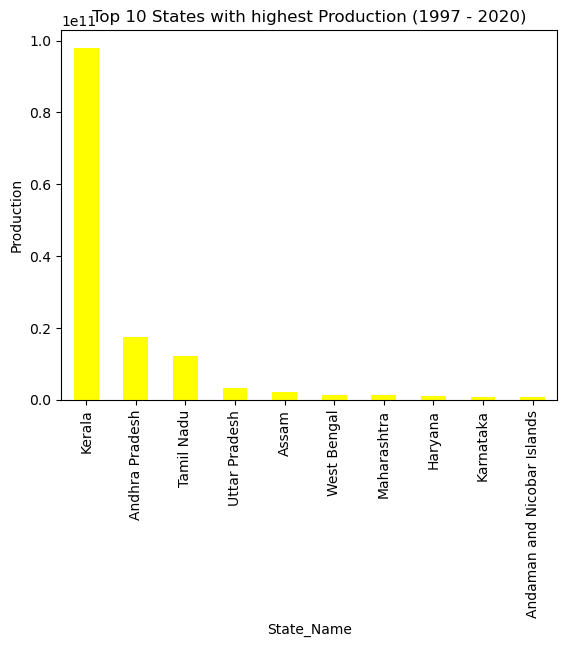

In [14]:
group_data = cpp_df.groupby('State_Name')['Production'].sum()
group_data = group_data.sort_values(ascending=False)
group_data[0:10].plot(kind='bar',color='yellow')
plt.title('Top 10 States with highest Production (1997 - 2020)')
plt.xlabel('State_Name')
plt.ylabel('Production')
plt.show()

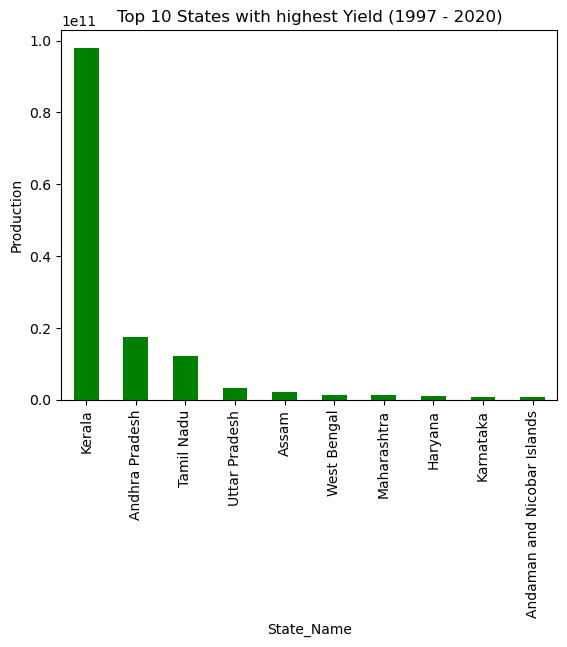

In [15]:
group_data = cpp_df.groupby('State_Name')['Production'].sum()
group_data = group_data.sort_values(ascending=False)
group_data[0:10].plot(kind='bar',color='green')
plt.title('Top 10 States with highest Yield (1997 - 2020)')
plt.xlabel('State_Name')
plt.ylabel('Production')
plt.show()

# Model for Forecasting Production

In [16]:
x=cpp_df.iloc[:,:-1].values
y=cpp_df.iloc[:,-1].values

In [17]:
x

array([['Andaman and Nicobar Islands', 'NICOBARS', 2000, 'Kharif     ',
        'Arecanut', 1254.0],
       ['Andaman and Nicobar Islands', 'NICOBARS', 2000, 'Kharif     ',
        'Other Kharif pulses', 2.0],
       ['Andaman and Nicobar Islands', 'NICOBARS', 2000, 'Kharif     ',
        'Rice', 102.0],
       ...,
       ['West Bengal', 'PURULIA', 2014, 'Whole Year ', 'Sugarcane',
        324.0],
       ['West Bengal', 'PURULIA', 2014, 'Winter     ', 'Rice', 279151.0],
       ['West Bengal', 'PURULIA', 2014, 'Winter     ', 'Sesamum', 175.0]],
      dtype=object)

In [18]:
y

array([2.00000e+03, 1.00000e+00, 3.21000e+02, ..., 1.62500e+04,
       5.97899e+05, 8.80000e+01])

In [19]:
data1 = cpp_df.drop(["District_Name","Crop_Year"],axis=1)

In [28]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape) 
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (164880, 164)
x_test : (81211, 164)
y_train : (164880, 1)
y_test : (81211, 1)


In [22]:
x_train[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
244270,778.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
222939,21.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229590,44.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225818,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17984,39500.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model - Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
preds = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.11296845207173434